| Question                                                                                                 | Can it answer? | New relations? | New opportunities? |
| -------------------------------------------------------------------------------------------------------- | -------------- | -------------- | ------------------ |
| Is the handover regular among doctors?                                                               |                |                |                    |
| What is the quality of the handover in its current unstructured form when compared to the SBAR standard? |                |                |                    |
| Is handover attended by all members of junior staff?                                                     |                |                |                    |
| What are reasons for delayed/interrupted handover?                                                       |                |                |                    |
| What are the preferred methods of handover among junior doctors?                                         |                |                |                    |
| Does the choice of handover method impact its quality?                                                   |                |                |                    |

In [53]:
import pandas as pd

df = pd.read_excel('/home/abdul/minal_ahmad/Data form (Responses).xlsx', engine='openpyxl')
df.head(3)


,Timestamp,Date,Handover Type,Method of delivering information,Time at the start of Handover,Time at the end of Handover,No. Of cases discussed,Total Number of doctors present on shift,Number of staff attending,Designation of doctor presenting,Designation of Antendees,Absent from meeting,Description of SITUATION,Description of BACKGROUND,Description of ASSESSMENT,Description of RECOMMENDATION,Interruption during handover
0,2024-08-14 16:38:49.777,2024-08-08,Morning,"Verbal, Bluespeir",08:00:00,09:00:00,34.0,10.0,10.0,"SHO, REGISTRAR","SHO, FY2, Registrar, Comsultant",NaN,Good,Good,Good,Excellent,NaN
1,2024-09-16 18:41:14.723,2024-08-08,Evening,Hand Written Note,17:00:00,17:05:00,4.0,10.0,1.0,SHO,SHO,"On Call SHO, On Call Registrar, Outliers SHO, ...",Good,Poor,Poor,Good,Nil
2,2024-10-20 12:52:13.667,2024-08-08,Night,"Hand Written Note, Verbal",20:10:00,20:25:00,5.0,3.0,2.0,SHO,SHO,On Call Registrar,Very Good,Good,Very Good,Good,Nil


In [54]:
# Assuming df is your DataFrame
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].astype('string')
# Verify the conversion
print("\n\n dtypes:\n\n",df.dtypes)

df.describe()




 dtypes:

 Timestamp                                   datetime64[ns]
Date                                        datetime64[ns]
Handover Type                               string[python]
Method of delivering information            string[python]
Time at the start of Handover               string[python]
Time at the end of Handover                 string[python]
No. Of cases discussed                             float64
Total Number of doctors present on shift           float64
Number of staff attending                          float64
Designation of doctor presenting            string[python]
Designation of Antendees                    string[python]
Absent from meeting                         string[python]
Description of SITUATION                    string[python]
Description of BACKGROUND                   string[python]
Description of ASSESSMENT                   string[python]
Description of RECOMMENDATION               string[python]
Interruption during handover               

,Timestamp,Date,No. Of cases discussed,Total Number of doctors present on shift,Number of staff attending
count,52,52,49.000000,50.000000,50.000000
mean,2024-10-17 22:44:25.750788352,2024-08-18 12:00:00,14.346939,6.720000,4.580000
min,2024-08-14 16:38:49.777000,2024-08-08 00:00:00,0.000000,3.000000,0.000000
25%,2024-10-20 12:52:13.667000064,2024-08-12 18:00:00,4.000000,3.000000,2.250000
50%,2024-11-01 03:36:30.276500224,2024-08-18 12:00:00,6.000000,8.000000,3.000000
75%,2024-11-08 11:54:10.377999872,2024-08-24 06:00:00,30.000000,10.000000,7.000000
max,2024-11-08 12:48:25.470000,2024-08-29 00:00:00,60.000000,12.000000,10.000000
std,NaN,NaN,15.289636,3.136617,2.741145


In [55]:
print("nulls? \n\n", df.isnull().sum(),"\n\nduplications? \n\n" ,df.duplicated().sum())

nulls? 

 Timestamp                                    0
Date                                         0
Handover Type                                0
Method of delivering information             0
Time at the start of Handover                3
Time at the end of Handover                  3
No. Of cases discussed                       3
Total Number of doctors present on shift     2
Number of staff attending                    2
Designation of doctor presenting             3
Designation of Antendees                     2
Absent from meeting                         19
Description of SITUATION                     2
Description of BACKGROUND                    2
Description of ASSESSMENT                    2
Description of RECOMMENDATION                2
Interruption during handover                22
dtype: int64 

duplications? 

 0


In [56]:
import datetime as dt

df['start_dt'] = pd.to_datetime(df['Time at the start of Handover'])
df['end_dt'] = pd.to_datetime(df['Time at the end of Handover'])
df['Duration between handovers'] = df['end_dt'] - df['start_dt']
df

/tmp/ipykernel_14915/2609157589.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['start_dt'] = pd.to_datetime(df['Time at the start of Handover'])
/tmp/ipykernel_14915/2609157589.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['end_dt'] = pd.to_datetime(df['Time at the end of Handover'])


,Timestamp,Date,Handover Type,Method of delivering information,Time at the start of Handover,Time at the end of Handover,No. Of cases discussed,Total Number of doctors present on shift,Number of staff attending,Designation of doctor presenting,Designation of Antendees,Absent from meeting,Description of SITUATION,Description of BACKGROUND,Description of ASSESSMENT,Description of RECOMMENDATION,Interruption during handover,start_dt,end_dt,Duration between handovers
0,2024-08-14 16:38:49.777,2024-08-08,Morning,"Verbal, Bluespeir",08:00:00,09:00:00,34.0,10.0,10.0,"SHO, REGISTRAR","SHO, FY2, Registrar, Comsultant",<NA>,Good,Good,Good,Excellent,<NA>,2024-11-12 08:00:00,2024-11-12 09:00:00,0 days 01:00:00
1,2024-09-16 18:41:14.723,2024-08-08,Evening,Hand Written Note,17:00:00,17:05:00,4.0,10.0,1.0,SHO,SHO,"On Call SHO, On Call Registrar, Outliers SHO, ...",Good,Poor,Poor,Good,Nil,2024-11-12 17:00:00,2024-11-12 17:05:00,0 days 00:05:00
2,2024-10-20 12:52:13.667,2024-08-08,Night,"Hand Written Note, Verbal",20:10:00,20:25:00,5.0,3.0,2.0,SHO,SHO,On Call Registrar,Very Good,Good,Very Good,Good,Nil,2024-11-12 20:10:00,2024-11-12 20:25:00,0 days 00:15:00
3,2024-09-16 18:43:35.941,2024-08-09,Morning,"Hand Written Note, Verbal, Email, Bluespeir",08:00:00,10:00:00,36.0,9.0,7.0,"SHO, REGISTRAR","SHO, FY2, Registrar, Comsultant",Coombs Ward SHO,Very Good,Very Good,Excellent,Excellent,Nil,2024-11-12 08:00:00,2024-11-12 10:00:00,0 days 02:00:00
4,2024-09-16 18:45:14.396,2024-08-09,Night,Verbal,20:15:00,20:30:00,4.0,3.0,2.0,SHO,SHO,On Call Registrar,Good,Good,Good,Good,Nil,2024-11-12 20:15:00,2024-11-12 20:30:00,0 days 00:15:00
5,2024-10-20 12:53:37.639,2024-08-09,Evening,Verbal,17:00:00,17:14:00,2.0,10.0,2.0,SHO,SHO,"On Call Registrar, Post Night SHO, Outliers SHO",Good,Good,Good,Good,Nil,2024-11-12 17:00:00,2024-11-12 17:14:00,0 days 00:14:00
6,2024-10-20 12:55:03.773,2024-08-10,Morning,"Hand Written Note, Verbal, Bluespeir",08:00:00,08:40:00,7.0,6.0,6.0,"FY2, REGISTRAR","SHO, FY2, Registrar, Comsultant",<NA>,Excellent,Very Good,Very Good,Excellent,Nil,2024-11-12 08:00:00,2024-11-12 08:40:00,0 days 00:40:00
7,2024-10-20 12:57:19.224,2024-08-10,Night,Hand Written Note,20:30:00,20:45:00,4.0,3.0,3.0,FY2,"SHO, FY2, Registrar",<NA>,Good,Good,Good,Good,Late start to handover due to unwell patient,2024-11-12 20:30:00,2024-11-12 20:45:00,0 days 00:15:00
8,2024-10-20 13:13:09.960,2024-08-11,Morning,"Hand Written Note, Verbal, Email, Bluespeir",08:00:00,08:25:00,7.0,6.0,6.0,"FY2, REGISTRAR","SHO, FY2, Registrar, Comsultant",<NA>,Excellent,Excellent,Very Good,Excellent,<NA>,2024-11-12 08:00:00,2024-11-12 08:25:00,0 days 00:25:00
9,2024-10-20 13:14:33.696,2024-08-11,Night,Verbal,20:15:00,20:30:00,3.0,3.0,2.0,FY2,SHO,On Call Registrar,Good,Good,Poor,Very Good,<NA>,2024-11-12 20:15:00,2024-11-12 20:30:00,0 days 00:15:00


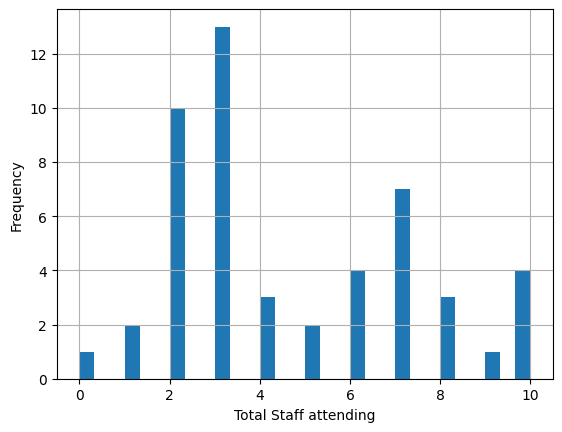

In [59]:
import matplotlib.pyplot as plt
df['Number of staff attending'].hist(bins=30)
plt.xlabel('Total Staff attending')
plt.ylabel('Frequency')
plt.show()

In [60]:
df.columns

Index(['Timestamp', 'Date', 'Handover Type',
       'Method of delivering information', 'Time at the start of Handover',
       'Time at the end of Handover', 'No. Of cases discussed ',
       'Total Number of doctors present on shift', 'Number of staff attending',
       'Designation of doctor presenting', 'Designation of Antendees',
       'Absent from meeting', 'Description of SITUATION',
       'Description of BACKGROUND', 'Description of ASSESSMENT',
       'Description of RECOMMENDATION', 'Interruption during handover',
       'start_dt', 'end_dt', 'Duration between handovers'],
      dtype='object')